# DATA VISUALIZATION

### BAR CHART, PIE CHART, HISTOGRAM, LINEPLOTS & SCATTER PLOTS

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='PREMIER LEAGUE TABLE - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Position,Team,GP,W,D,L,GF,GA,GD,Points
0,1,Liverpool FC,18,17,1,0,46,14,32,52
1,2,Leicester City,19,12,3,4,41,18,23,39
2,3,Manchester City,19,12,2,5,52,23,29,38
3,4,Chelsea,19,10,2,7,33,27,6,32
4,5,Wolverhampton Wanderers,19,7,9,3,29,24,5,30


## BAR CHART

In [2]:
df_football = df_data_1

In [3]:
df_football1 = df_football[['Team', 'Points']]

In [4]:
df_football1 = df_football1.sort_values(by = "Points", ascending = True)

In [5]:
ind = df_football1.set_index("Team", inplace = True)

In [6]:
## Import data visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

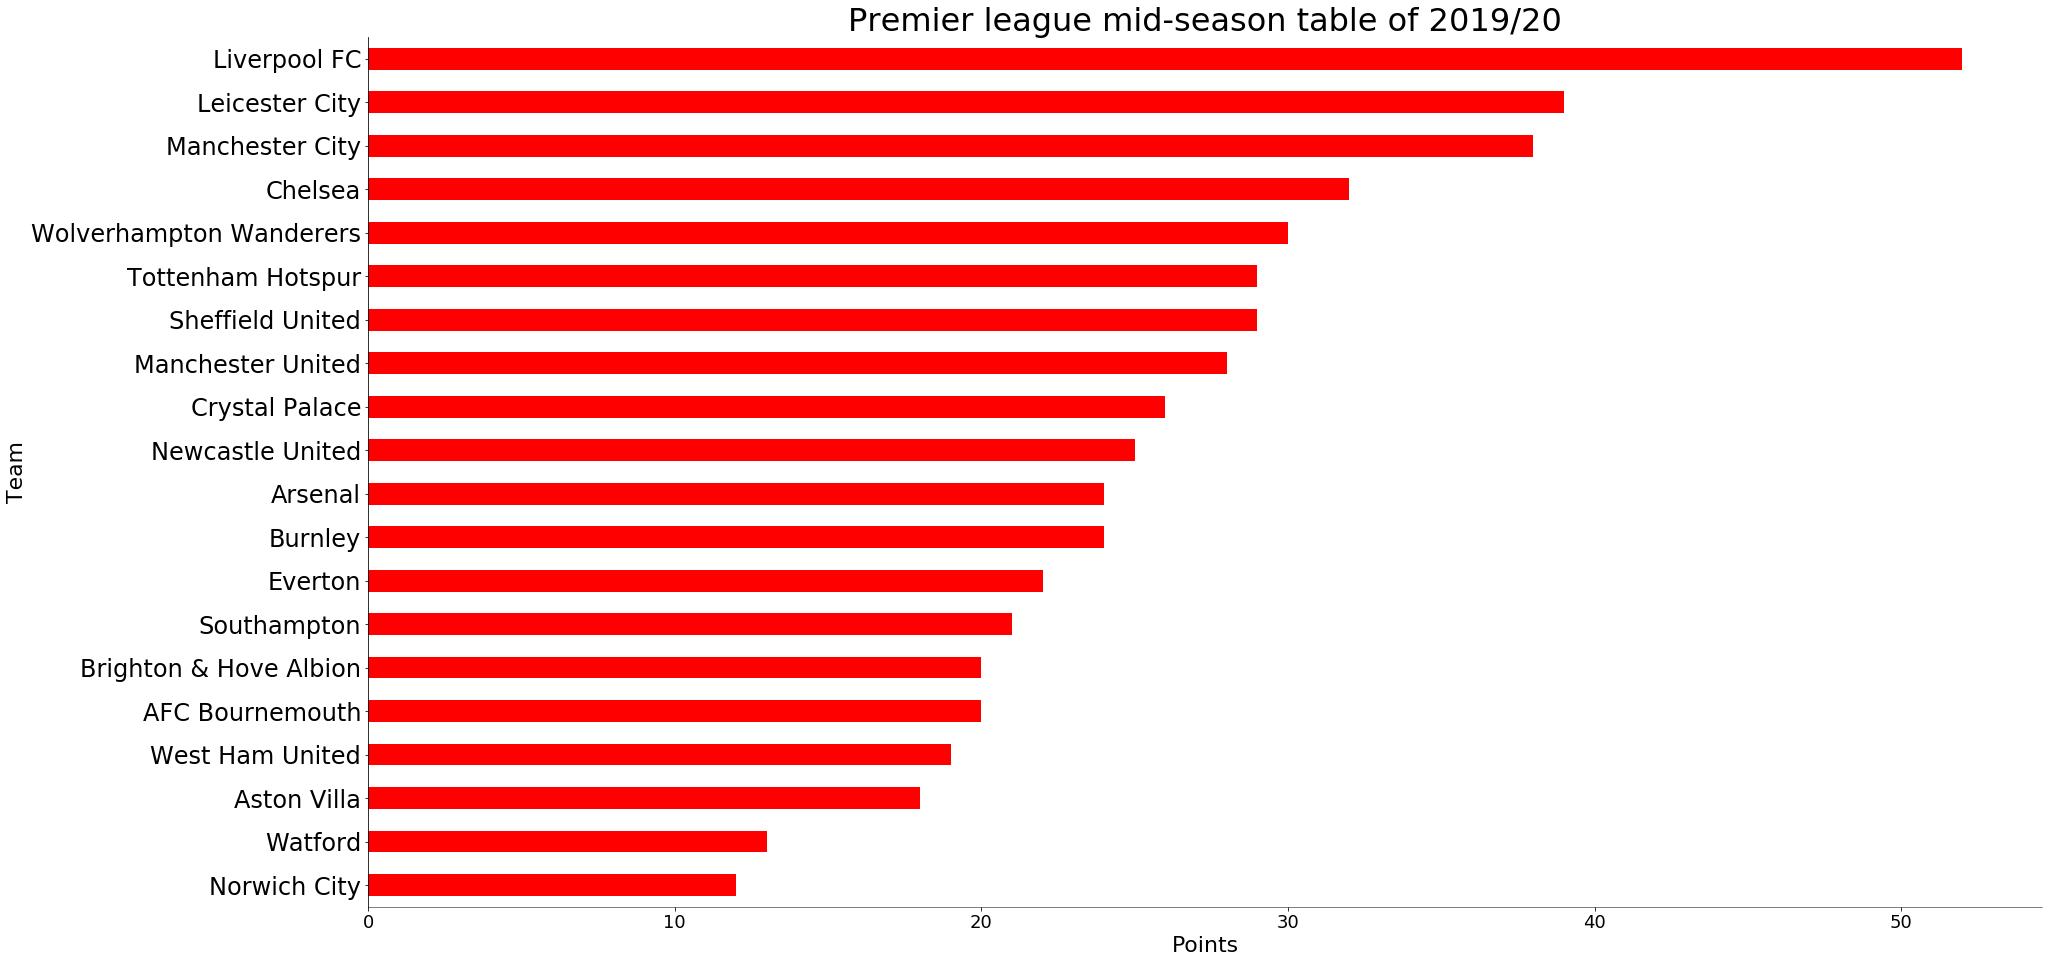

In [7]:
## A horizontal bar graph of the premier league mid-table
barh = df_football1.plot(kind='barh',figsize=(30, 16), color = "red", legend = None)
barh
plt.yticks(fontsize = 24)
plt.xticks(ind,fontsize = 18)
plt.xlabel("Points", fontsize = 22)
plt.ylabel("Team", fontsize = 22)
plt.title("Premier league mid-season table of 2019/20", fontsize=32)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.5)
barh.spines['left'].set_visible(True)
plt.show()

In [8]:
df_football2 = df_football[['Team', 'GA']]

In [9]:
ind2 = df_football2.set_index("Team", inplace = True)

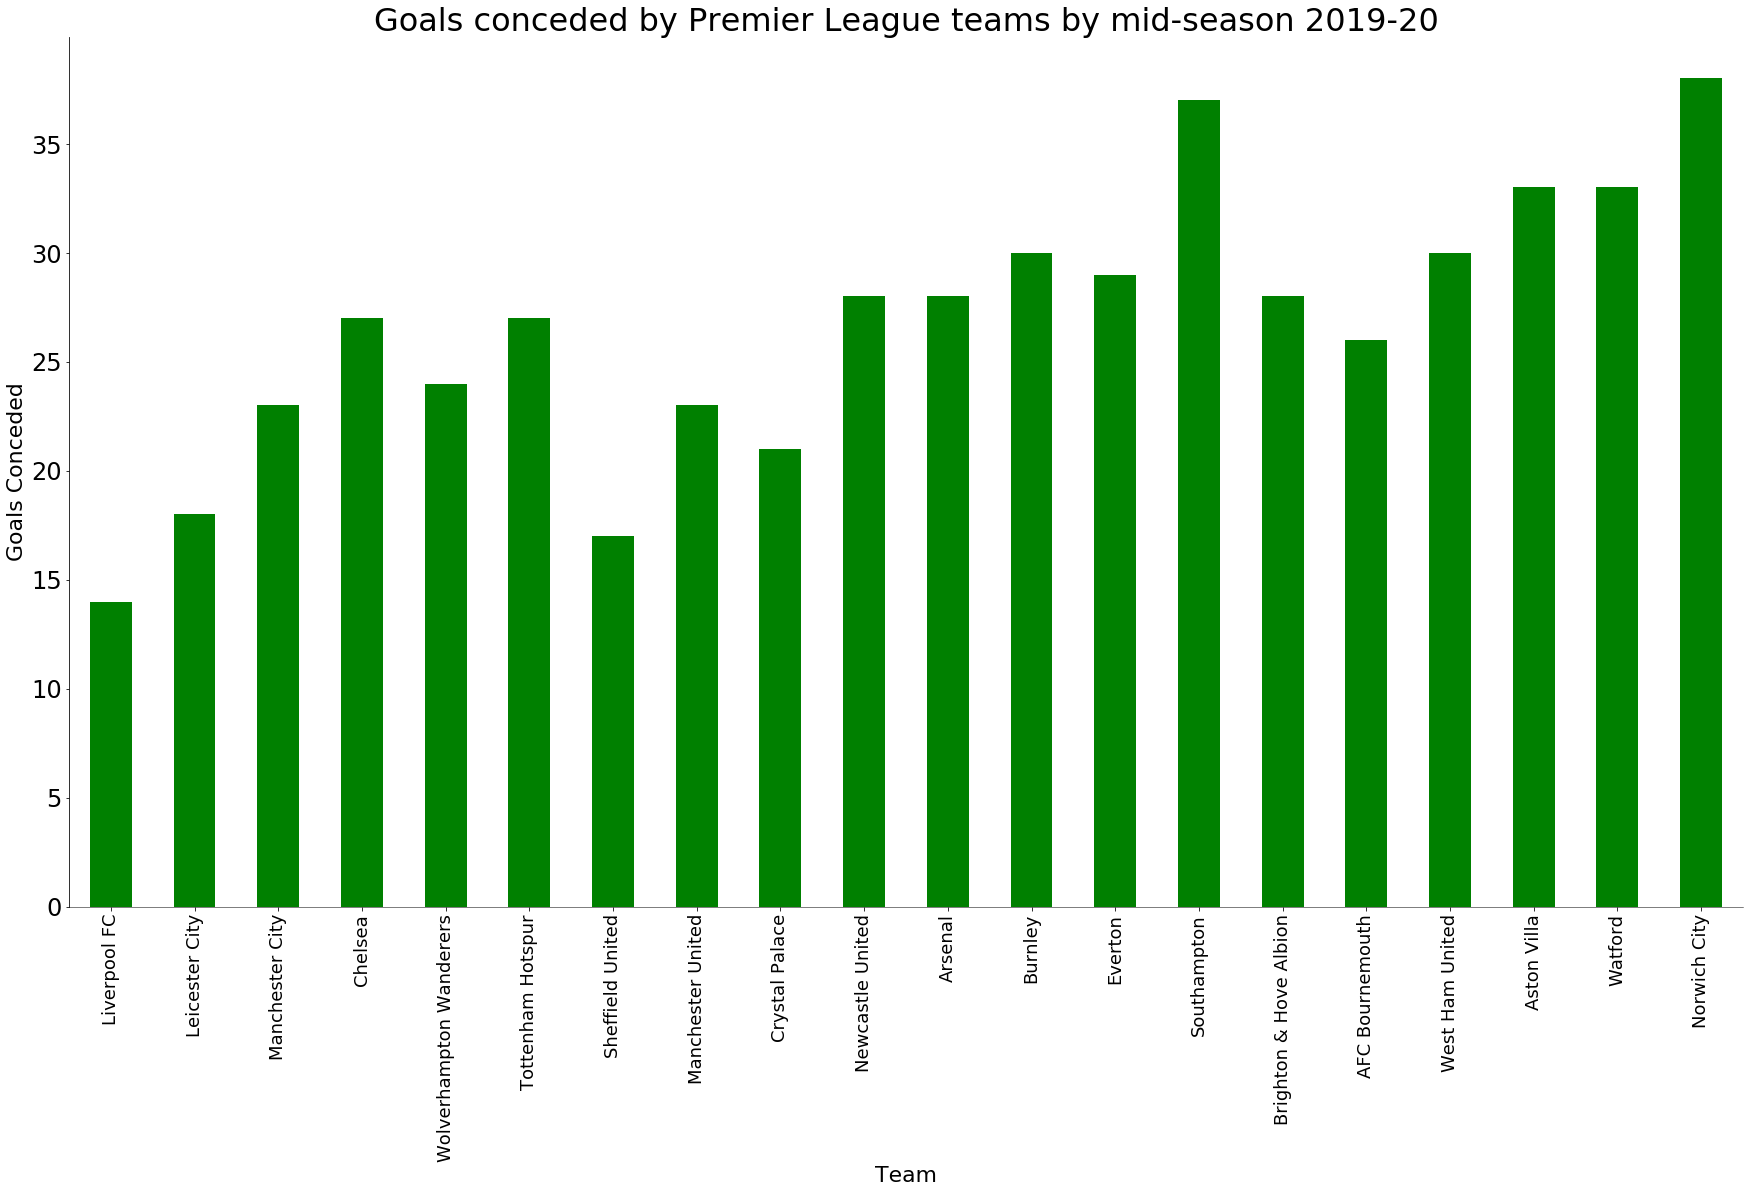

In [10]:
## A bar graph of the premier league mid-table
bar = df_football2.plot(kind='bar',figsize=(30, 16), color = "green", legend = None)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind,fontsize = 18)
plt.ylabel("Goals Conceded", fontsize = 22)
plt.xlabel("Team", fontsize = 22)
plt.title("Goals conceded by Premier League teams by mid-season 2019-20", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

## PIE CHART

In [11]:
df_football3 = df_football[['Team', 'GF']]

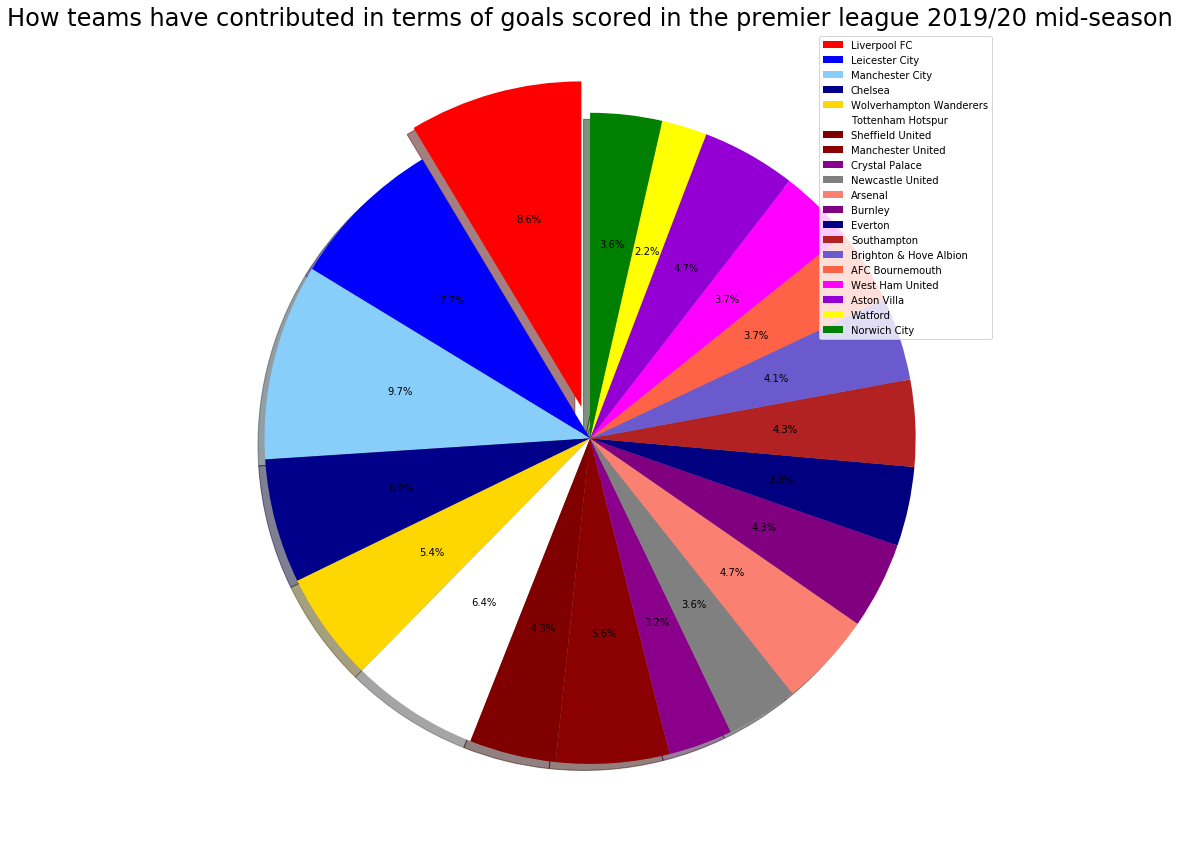

In [12]:
## A pie chart showing how the teams have contributed so far
labels = df_football3['Team']
colors = ['red', 'blue', 'lightskyblue', 'darkblue', 'gold', 'white','maroon','darkred', 'darkmagenta', 'grey', 'salmon','purple','navy','firebrick','slateblue','tomato','magenta','darkviolet','yellow', 'green' ]
explode =(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
fig, ax1 = plt.subplots(figsize = (24,12))
ax1.pie(df_football3['GF'], explode = explode, colors=colors, startangle=90, autopct='%.1f%%', shadow = True)
plt.title("How teams have contributed in terms of goals scored in the premier league 2019/20 mid-season", fontsize = 24)
ax1.legend(labels, loc = "upper right")
plt.tight_layout()
plt.show()

## SCATTERPLOT

In [13]:
from sklearn import linear_model
line1 = linear_model.LinearRegression()

In [14]:
df_GF = df_football.loc[:, "GF"].values.reshape(-1, 1) 
df_Points = df_football.loc[:, "Points"].values.reshape(-1, 1)

In [15]:
line1.fit(df_GF, df_Points) 
pred1 = line1.predict(df_GF)

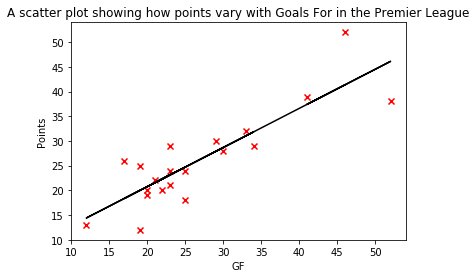

In [16]:
plt.scatter('GF', 'Points', data = df_football, marker = 'x', color = 'red')
plt.xlabel("GF")
plt.ylabel("Points")
plt.title("A scatter plot showing how points vary with Goals For in the Premier League")
plt.plot(df_GF,pred1, color='black')
plt.show()

In [17]:
df_football.corr()

,Position,GP,W,D,L,GF,GA,GD,Points
Position,1.000000,0.086711,-0.869504,0.099441,0.884402,-0.794628,0.801721,-0.895400,-0.929536
GP,0.086711,1.000000,-0.384716,0.308757,0.289229,-0.212883,0.256831,-0.257922,-0.345451
W,-0.869504,-0.384716,1.000000,-0.487917,-0.767828,0.872025,-0.737407,0.921509,0.976165
D,0.099441,0.308757,-0.487917,1.000000,-0.179084,-0.398845,-0.073755,-0.245111,-0.286846
L,0.884402,0.289229,-0.767828,-0.179084,1.000000,-0.677291,0.885401,-0.849886,-0.887200
GF,-0.794628,-0.212883,0.872025,-0.398845,-0.677291,1.000000,-0.561539,0.934848,0.857861
GA,0.801721,0.256831,-0.737407,-0.073755,0.885401,-0.561539,1.000000,-0.818739,-0.827625
GD,-0.895400,-0.257922,0.921509,-0.245111,-0.849886,0.934848,-0.818739,1.000000,0.950392
Points,-0.929536,-0.345451,0.976165,-0.286846,-0.887200,0.857861,-0.827625,0.950392,1.000000


## HISTOGRAM

In [18]:

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='fifa19_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Unnamed: 0,Age,Overall,Potential,Value,Jersey Number,Release Clause
0,0,31,94,94,110.5,10.0,226.5
1,1,33,94,94,77.0,7.0,127.1
2,2,26,92,93,118.5,10.0,228.1
3,3,27,91,93,72.0,1.0,138.6
4,4,27,91,92,102.0,7.0,196.4


In [19]:
df_fifa = df_data_2['Overall']

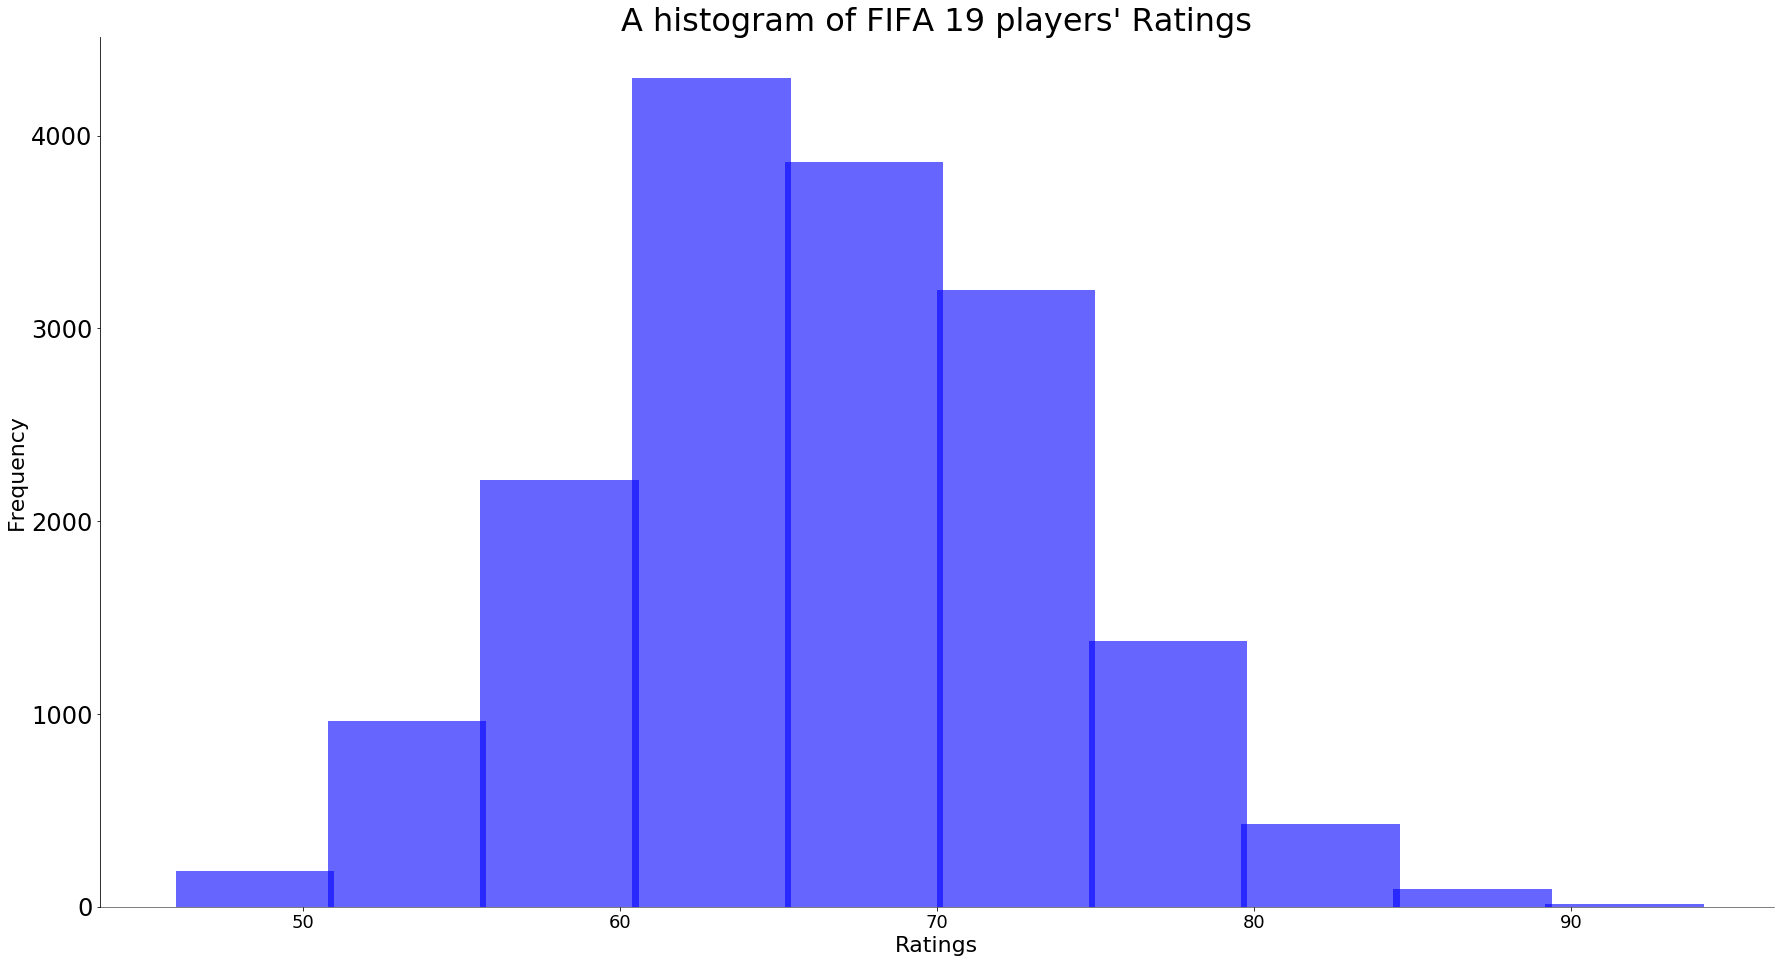

In [20]:
## A histogram of the FIFA 19 player's ratings
bar = df_fifa.plot(kind='hist',figsize=(30, 16), color = "blue", legend = None, width = 5, alpha = 0.6)
bar
plt.yticks(fontsize = 24)
plt.xticks(ind,fontsize = 18)
plt.ylabel("Frequency", fontsize = 22)
plt.xlabel("Ratings",fontsize = 22)
plt.title("A histogram of FIFA 19 players' Ratings", fontsize=32)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

In [21]:

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='Top 200 rated IMDB TV episodes - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,TV show,Episode,Genre,Rating,Year,Votes
0,Attack on Titan,Hero,"Animation, Action, Adventure",10.0,2019,20785
1,Attack on Titan,Perfect Game,"Animation, Action, Adventure",9.9,2019,7060
2,Chernobyl,Vichnaya Pamyat,"Drama, History",9.9,2019,44285
3,Game of Thrones,The Winds of Winter,"Action, Adventure, Drama",9.9,2016,125599
4,Game of Thrones,Battle of the Bastards,"Action, Adventure, Drama",9.9,2016,181164


In [22]:
df_tv = df_data_3

In [23]:
## Creating a new dataframe based on year and votes
df_tv1 = df_tv[['Year', 'Votes']]
## Grouping year based on votes
df_tv1 = df_tv1.groupby(['Year'],as_index=False).sum()
df_tv1.head()

,Year,Votes
0,1994,1603
1,1995,3644
2,1999,5451
3,2001,25667
4,2004,24635


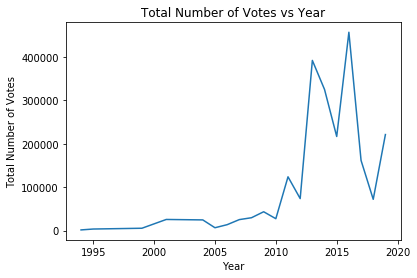

In [24]:
## A line plot showing Total Number of Votes vs Year
sns.lineplot(x="Year", y="Votes", data=df_tv1)
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.title('Total Number of Votes vs Year')
plt.show()